1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction score: 0.49657773971557617
With Mask


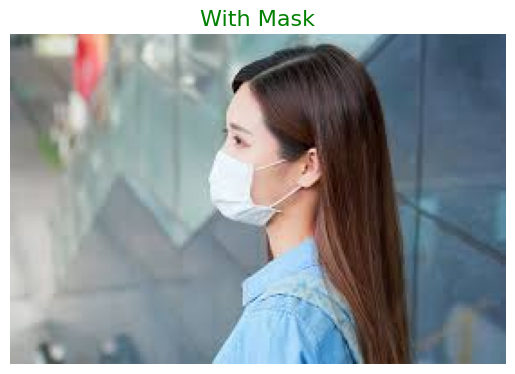

In [4]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


model = load_model('mask_detector.h5')
def predict_mask(image_path, img_size=224):
    img = cv2.imread(image_path)
    if img is None:
        return "Không thể đọc ảnh"
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Chuẩn hóa
    img = np.expand_dims(img, axis=0)  # Thêm batch dimension
    prediction = model.predict(img)
    label = "With Mask" if prediction[0][0] < 0.5 else "Without Mask"
    print(f"Prediction score: {prediction[0][0]}")  # In giá trị dự đoán
    print(label)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(label, fontsize=16, color='green' if label == "With Mask" else 'red')
    plt.show()
    return ''
print(predict_mask(r'D:\code\1SU25-DPL\PRJ4-Facemaskphanloai\data\test_image\test_mask_0.jpg'))